In [802]:
## libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime


In [803]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [804]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [805]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-20 09:22:16.603883


In [806]:
#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset
#df_reviews = pd.read_csv('../dataset/out.csv') # small part of the dataset

# dataset size:
print(f'Numero de linha: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Numero de linha: 568454, numero de colunas: 10


In [807]:
######## parte do dataset
df_reviews_small = df_reviews.copy()
df_reviews = df_reviews_small.sample(10000) # FIXME remover no final

In [808]:
# Lista valores faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   1
Text                      0
dtype: int64

In [809]:
# dataset - tamanho
df_reviews.shape

(10000, 10)

In [810]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [811]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [812]:
df_reviews.shape

(9999, 10)

In [813]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [814]:
df_reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
554954,554955,B003GPMSLK,A1NBMOTS58L3O4,"J. A. Bergeron ""godmother""",0,0,5,1324944000,Yummy on roast beef,Seems like the perfect solution for a turkey o...
122694,122695,B001MWRT2W,A2S8GKQ5V5OL37,Sarah Moon,1,1,5,1286496000,My Dog Loves Zukes Cranberry Bones!,Full disclosure: I haven't chewed on these bon...
92727,92728,B001AHJ2D8,A3F6Y22G5MS9M0,Calliopia,0,0,5,1319587200,Excellent Chips.,These are excellent chips. I have enjoyed the...


In [815]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    6425
4    1402
1     920
2     486
Name: Score, dtype: int64

In [816]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [817]:
df_reviews["negative"].value_counts()

0    7827
1    1406
Name: negative, dtype: int64

In [818]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"Seems like the perfect solution for a turkey or roast beef club without the hassle of cooking bacon. Juat the right amount of bacon flavor.Full disclosure: I haven't chewed on these bones myself--this review is based on what I perceive is my dog's opinion. ;-)<br /><br />Zukes cranberry bones are my dog's favorite bones, paws down. She seems like the other flavors, but the cranberry ones are the ones that literally make her drool as I had them to her. I love that they take quite a bit of time for her to chew (a couple hours), they don't stain the carpet and that they make her breath fresh and her teeth clean. She's a 45-50 pound Australian Shepherd and the small size is perfect for her. I've bought the medium for her in the past, which she loves, but it's really probably too many empty calories for her size, so I switched to the small. I'm very appreciative that they have a pleasant, slightly earthy, odor--so many dog treats smell really rancid, because there for, you know, dogs who a

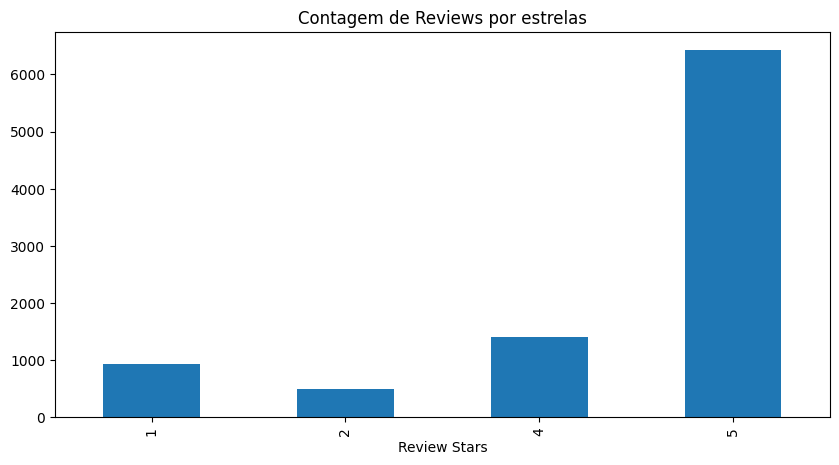

In [819]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
plt.show()

In [820]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [821]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [822]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'br': 4107,
 'like': 4028,
 'good': 3042,
 'one': 2753,
 'great': 2657,
 'taste': 2535,
 'coffee': 2468,
 'tea': 2275,
 'product': 2193,
 'love': 2129}

In [823]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

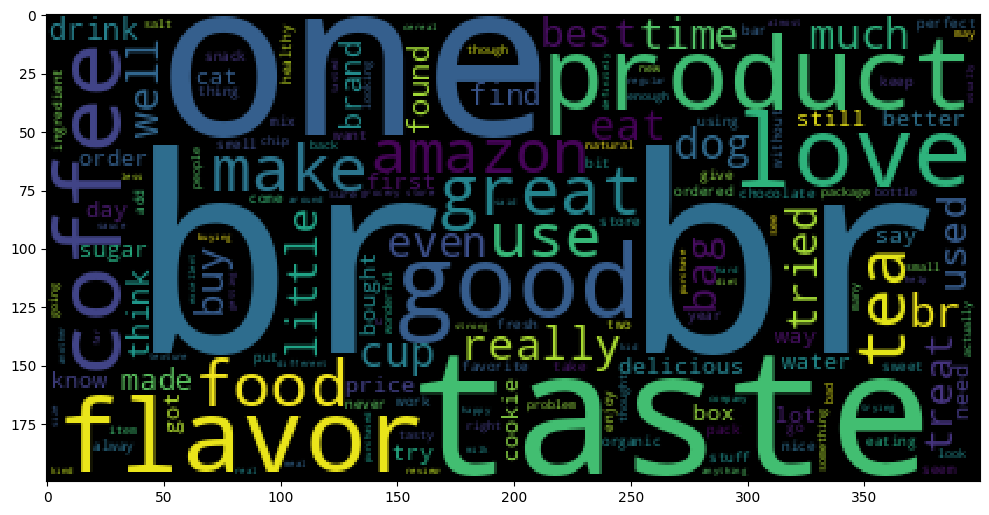

In [824]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [825]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'br': 4107,
 'like': 4028,
 'good': 3042,
 'one': 2753,
 'great': 2657,
 'taste': 2535,
 'coffee': 2468,
 'tea': 2275,
 'product': 2193,
 'love': 2129}

In [826]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [827]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

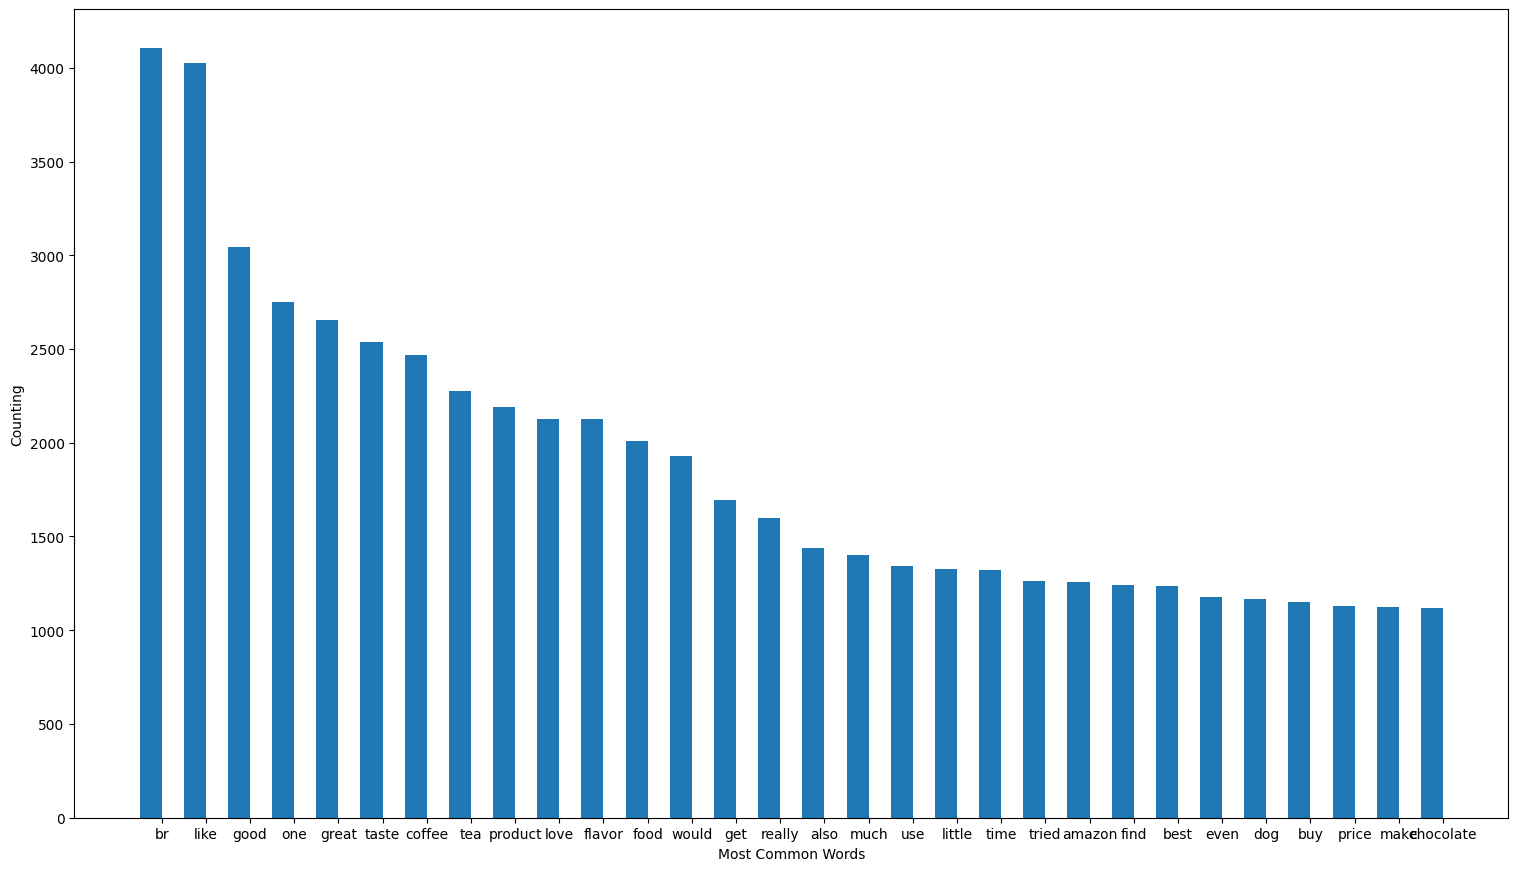

In [828]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

### Data Preparation

In [829]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [830]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [831]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [832]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [833]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [834]:
df_reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'negative'],
      dtype='object')

In [835]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [836]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 554954 to 214787
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      9233 non-null   int64 
 1   ProductId               9233 non-null   object
 2   UserId                  9233 non-null   object
 3   ProfileName             9233 non-null   object
 4   HelpfulnessNumerator    9233 non-null   int64 
 5   HelpfulnessDenominator  9233 non-null   int64 
 6   Score                   9233 non-null   int64 
 7   Time                    9233 non-null   int64 
 8   Summary                 9233 non-null   object
 9   Text                    9233 non-null   object
 10  negative                9233 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 865.6+ KB


In [837]:
df_reviews['Text']

554954    seem like perfect solut turkey roast beef club...
122694    full disclosur chew bone review base perceiv d...
92727     excel chip enjoy larger bag happi find afford ...
297544    60 lb dog love picki food treat eat readili ne...
470870    read product info care buy realis one add oil ...
                                ...                        
73378     love granoro product difficult find 00 flour a...
443091    contain propylparaben estrogen disruptor molec...
116596    best popcorn easi make love come one packet pe...
32932     golden retriev golden chow mix rescu around ag...
214787    use frs product 3 month found seem increas ene...
Name: Text, Length: 9233, dtype: object

In [838]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [839]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

554954    seem like perfect solut turkey roast beef club...
122694    full disclosur chew bone review base perceiv d...
92727     excel chip enjoy larger bag happi find afford ...
297544    60 lb dog love picki food treat eat readili ne...
470870    read product info care buy realis one add oil ...
                                ...                        
73378     love granoro product difficult find 00 flour a...
443091    contain propylparaben estrogen disruptor molec...
116596    best popcorn easi make love come one packet pe...
32932     golden retriev golden chow mix rescu around ag...
214787    use fr product 3 month found seem increas ener...
Name: Text, Length: 9233, dtype: object

In [840]:
# Set the parameters
max_features = 5000  # Maximum number of words to keep
max_length = 300  # Maximum length of each review
batch_size = 64
epochs = 10

In [841]:
# Build the model
model_tf = Sequential()
model_tf.add(Embedding(max_features, 128))
model_tf.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_tf.add(Dense(1, activation='sigmoid'))

# Compile the model
model_tf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [842]:
#Salvando modelo 
pickle.dump(model_tf,open('model_tensorflow.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-20 09:23:26         2223
metadata.json                                  2023-05-20 09:23:26           64
variables.h5                                   2023-05-20 09:23:26      3103176


In [843]:
X = df_reviews['Text']
y = df_reviews['negative']

In [844]:
X = np.array(df_reviews['Text'])
y = np.array(df_reviews['negative'])

In [845]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
#word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (15654, 13658)
y.shape =  (15654,)


In [846]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4, random_state=0)

In [847]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [848]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

### Modeling

#### Gaussian Naive Bayes (GaussianNB).

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.74      0.85      4723
    Negativo       0.79      1.00      0.88      4669

    accuracy                           0.87      9392
   macro avg       0.89      0.87      0.87      9392
weighted avg       0.90      0.87      0.87      9392

ROC Score: 0.8683040440398052
Accuracy Score: 0.8675468483816013
Average Precision Score: 0.7896161001183832
f1 Score: 0.8824418824418825
Confusion matrix, without normalization
[[3479 1244]
 [   0 4669]]


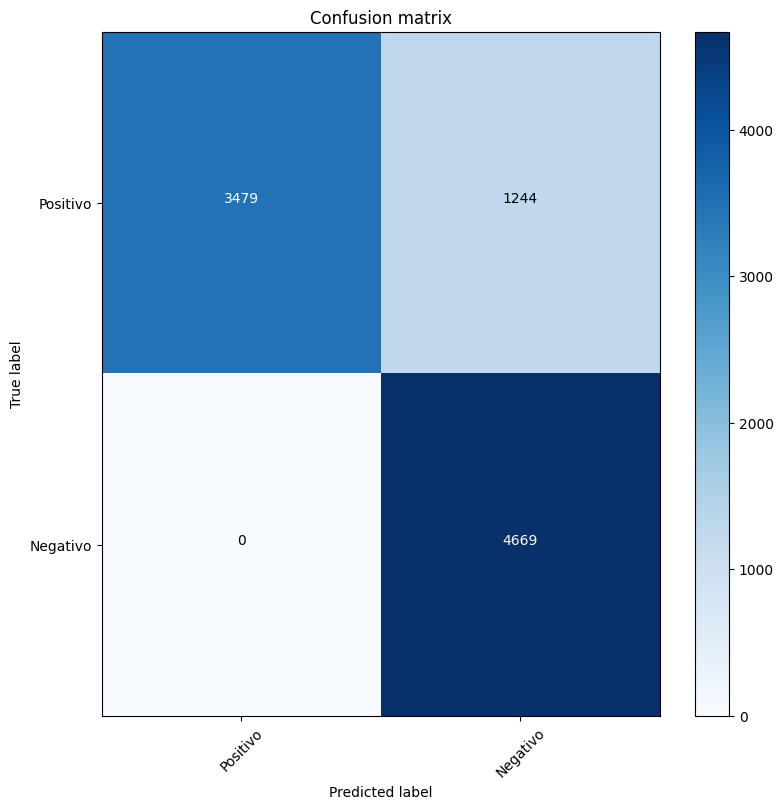

In [849]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.74      0.80      4723
    Negativo       0.77      0.90      0.83      4669

    accuracy                           0.82      9392
   macro avg       0.83      0.82      0.82      9392
weighted avg       0.83      0.82      0.82      9392

ROC Score: 0.8198911040230165
Accuracy Score: 0.8194207836456558
Average Precision Score: 0.7457914031928072
f1 Score: 0.8323448003163305
Confusion matrix, without normalization
[[3486 1237]
 [ 459 4210]]


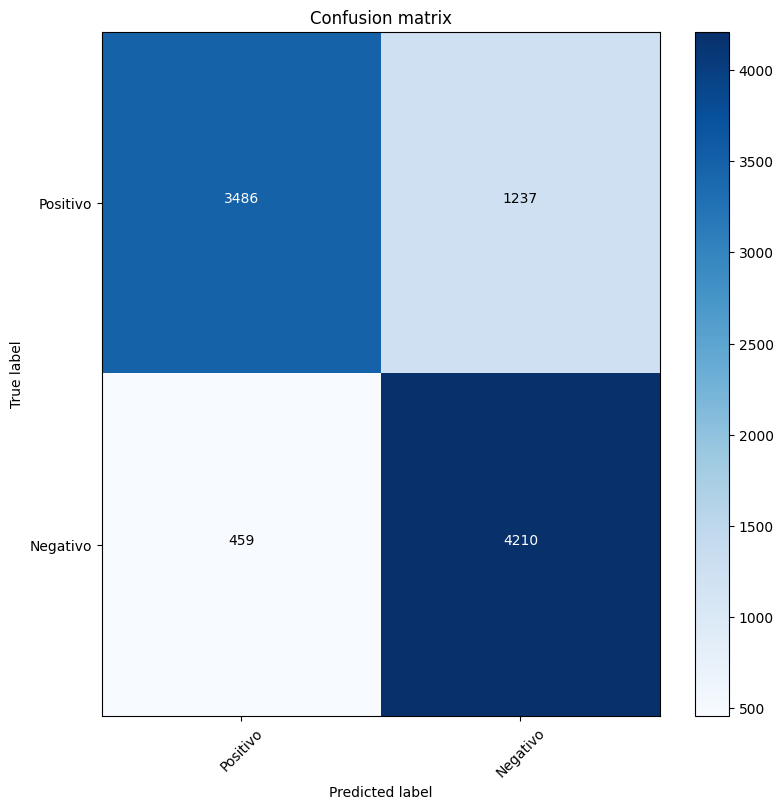

In [852]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)

roc_bnb = clf_eval(clf_bnb, x_train, y_train)

In [851]:
# Train the model
#model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))